# Step 1: Overview and Dataset Selection

About Dataset
Context
The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository

Content
Title: Auto-Mpg Data

Sources:
(a) Origin: This dataset was taken from the StatLib library which is
maintained at Carnegie Mellon University. The dataset was
used in the 1983 American Statistical Association Exposition.
(c) Date: July 7, 1993

Past Usage:

See 2b (above)
Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
In Proceedings on the Tenth International Conference of Machine
Learning, 236-243, University of Massachusetts, Amherst. Morgan
Kaufmann.
Relevant Information:

This dataset is a slightly modified version of the dataset provided in
the StatLib library. In line with the use by Ross Quinlan (1993) in
predicting the attribute "mpg", 8 of the original instances were removed
because they had unknown values for the "mpg" attribute. The original
dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon,
to be predicted in terms of 3 multivalued discrete and 5 continuous
attributes." (Quinlan, 1993)

Number of Instances: 398

Number of Attributes: 9 including the class attribute

Attribute Information:

mpg: continuous

cylinders: multi-valued discrete

displacement: continuous

horsepower: continuous

weight: continuous

acceleration: continuous

model year: multi-valued discrete

origin: multi-valued discrete

car name: string (unique for each instance)

Missing Attribute Values: horsepower has 6 missing values

Acknowledgements

Dataset: UCI Machine Learning Repository

Data link : https://archive.ics.uci.edu/ml/datasets/auto+mpg

Inspiration
I have used this dataset for practicing my exploratory analysis skills.

# Step 2: Load the Necessary Libraries

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LinearRegression, Ridge
from sklearn.metrics         import mean_squared_error, r2_score
import joblib

# Step 3: Load The Dataset

In [2]:
df = pd.read_csv('data/auto-mpg.csv')

# Step 4: Exploratory Data Analysis

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [5]:
# Check for missing value
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
# Summary statistics
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
# Correlation Matrix and Visualisation of Correlations
corr_matrix = df.corr(numeric_only = True)

In [8]:
corr_matrix

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


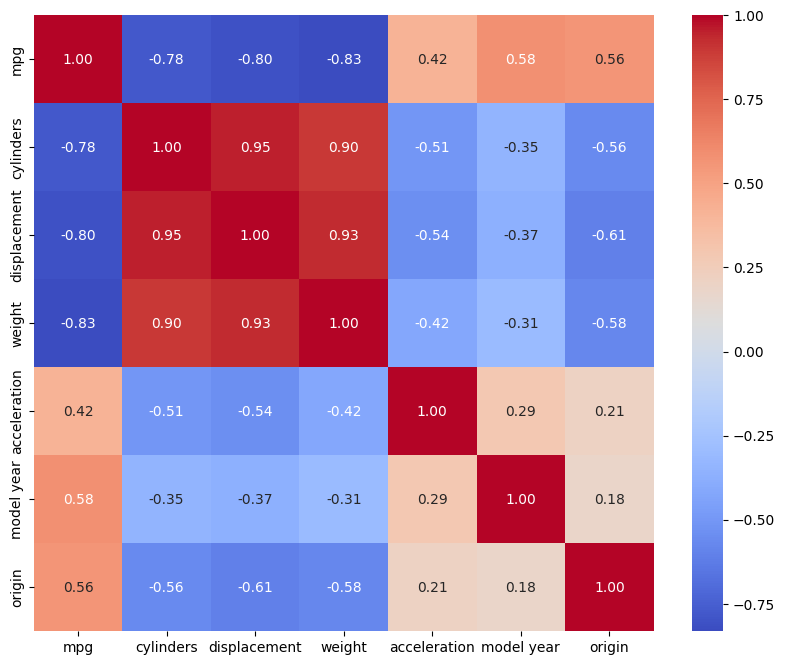

In [9]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

In [10]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [12]:
# Select categorical features
df.select_dtypes(include = ['object']).columns

Index(['horsepower', 'car name'], dtype='object')

In [13]:
# We drop the name car name feature as it does not hold relevant information about mpg
df.drop(columns = ['car name'], axis = 1, inplace = True)

In [14]:
# Replace value for row with '?' as horsepower with the mode
df['horsepower'] = df['horsepower'].replace('?', 150)

# Print all unique values of the string feature 'horsepower' after replacing '?' value
print(df['horsepower'].unique())

# We convert the horsepower to float
df['horsepower'] = df['horsepower'].astype(np.int64)

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' 150 '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


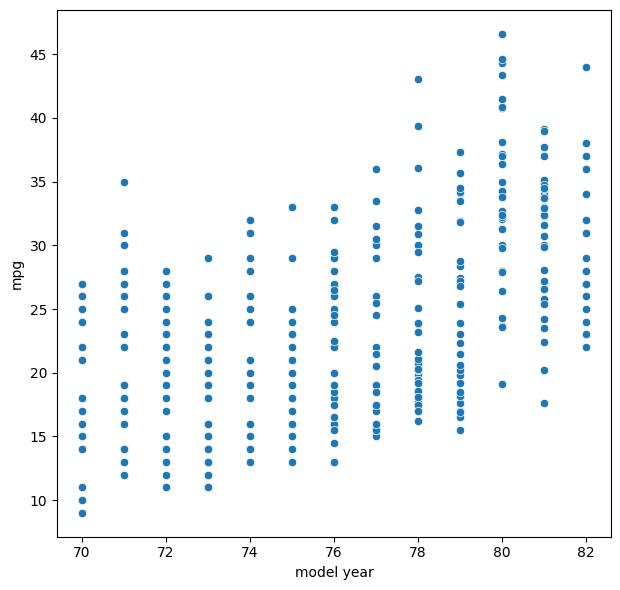

In [ ]:
# Create subplots of highly positively correlated features with the target
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = 'model year', y = 'mpg', data = df)
plt.tight_layout()
plt.show()

# model year shows a clear positive trend with the mpg

In [22]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

# Step 5: Feature Engineering

In [35]:
# Scale features
standard_scaler = StandardScaler()
scaled_features = standard_scaler.fit_transform(df.drop('mpg', axis = 1))
columns         = list(df.columns)
columns.remove('mpg')

df_scaled        = pd.DataFrame(scaled_features, columns = columns)
df_scaled['mpg'] = df['mpg']
df_scaled

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
0,1.498191,1.090604,0.644426,0.630870,-1.295498,-1.627426,-0.715145,18.0
1,1.498191,1.503514,1.552280,0.854333,-1.477038,-1.627426,-0.715145,15.0
2,1.498191,1.196232,1.163200,0.550470,-1.658577,-1.627426,-0.715145,18.0
3,1.498191,1.061796,1.163200,0.546923,-1.295498,-1.627426,-0.715145,16.0
4,1.498191,1.042591,0.903813,0.565841,-1.840117,-1.627426,-0.715145,17.0
...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.496876,-0.213324,0.011586,1.621983,-0.715145,27.0
394,-0.856321,-0.925936,-1.378791,-0.993671,3.279296,1.621983,0.533222,44.0
395,-0.856321,-0.561039,-0.548753,-0.798585,-1.440730,1.621983,-0.715145,32.0
396,-0.856321,-0.705077,-0.678446,-0.408411,1.100822,1.621983,-0.715145,28.0


# Step 6: Split the Data

In [ ]:
X = df_scaled.drop('mpg', axis = 1)
y = df_scaled['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test

(     cylinders  displacement  horsepower    weight  acceleration  model year  \
 3     1.498191      1.061796    1.163200  0.546923     -1.295498   -1.627426   
 18   -0.856321     -0.925936   -0.444998 -0.993671     -0.387801   -1.627426   
 376  -0.856321     -0.983552   -0.963772 -1.117818      0.955591    1.621983   
 248  -0.856321     -0.983552   -1.171281 -1.383845      0.302049    0.538847   
 177  -0.856321     -0.753090   -0.263428 -0.326829     -0.206262   -0.273506   
 ..         ...           ...         ...       ...           ...         ...   
 71   -1.444949     -1.185206   -0.211550 -0.757202     -0.750880   -1.085858   
 106   1.498191      1.503514    1.941360  1.807303     -1.113959   -0.815074   
 270  -0.856321     -0.570641   -0.263428 -0.538469     -0.278877    0.538847   
 348  -0.856321     -1.002757   -1.119404 -1.088259      0.628820    1.351199   
 102  -0.856321     -0.925936   -1.534423 -1.206493      1.972212   -0.815074   
 
        origin  
 3   -0.7

In [ ]:
print("\nTraining set shape", X_train.shape)
print("\nTesting set shape", X_test.shape)

Training set shape (318, 7)
Testing set shape (80, 7)


In [44]:
print(X),
print(y)

     cylinders  displacement  horsepower    weight  acceleration  model year  \
0     1.498191      1.090604    0.644426  0.630870     -1.295498   -1.627426   
1     1.498191      1.503514    1.552280  0.854333     -1.477038   -1.627426   
2     1.498191      1.196232    1.163200  0.550470     -1.658577   -1.627426   
3     1.498191      1.061796    1.163200  0.546923     -1.295498   -1.627426   
4     1.498191      1.042591    0.903813  0.565841     -1.840117   -1.627426   
..         ...           ...         ...       ...           ...         ...   
393  -0.856321     -0.513026   -0.496876 -0.213324      0.011586    1.621983   
394  -0.856321     -0.925936   -1.378791 -0.993671      3.279296    1.621983   
395  -0.856321     -0.561039   -0.548753 -0.798585     -1.440730    1.621983   
396  -0.856321     -0.705077   -0.678446 -0.408411      1.100822    1.621983   
397  -0.856321     -0.714680   -0.600630 -0.296088      1.391285    1.621983   

       origin  
0   -0.715145  
1   -0.

# Step 7: Train the Model

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
print("\nModel Coefficients:")
for feature, coef in zip(columns, model.coef_):
    print(f"\n {feature}: {coef:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")


Model Coefficients:

 cylinders: -0.2384
Intercept: 23.5022

 displacement: 1.3647
Intercept: 23.5022

 horsepower: -0.2380
Intercept: 23.5022

 weight: -5.8300
Intercept: 23.5022

 acceleration: 0.2740
Intercept: 23.5022

 model year: 2.9618
Intercept: 23.5022

 origin: 1.0256
Intercept: 23.5022


# Step 8: Evaluate the Model

In [49]:
y_pred = model.predict(X_test)
mse    = mean_squared_error(y_test, y_pred)
r2     = r2_score(y_test, y_pred)

print(f"\n Model Performance on Test Set:")
print(f"\n Mean Squared Error: {mse:.4f}")
print(f"\n R2 Squared: {r2:.4f}")


 Model Performance on Test Set:

 Mean Squared Error: 8.1959

 R2 Squared: 0.8476
